<a href="https://colab.research.google.com/github/splinter-12/projet-svd-/blob/main/svd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

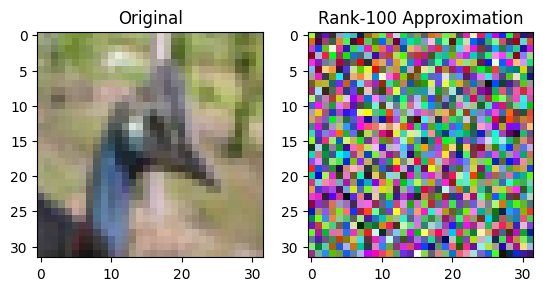

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
# Définir le chemin vers les fichiers de données
data_path = "/content/drive/MyDrive/cifar-10-batches-py/"
# Définir une fonction pour charger les données à partir d'un fichier
def load_data(file):
    with open(data_path + file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data
# Charger les données d'entraînement
train_data = []
train_labels = []
for i in range(1, 6):
    data_batch = load_data("data_batch_" + str(i))
    train_data.append(data_batch[b'data'])
    train_labels += data_batch[b'labels']
train_data = np.concatenate(train_data, axis=0)
train_data = train_data.reshape((50000, 3, 32, 32)).transpose(0, 2, 3, 1)
# Charger les données de test
test_data = load_data("test_batch")[b'data']
test_labels = load_data("test_batch")[b'labels']
test_data = test_data.reshape((10000, 3, 32, 32)).transpose(0, 2, 3, 1)
# Aplatir les données d'entraînement
train_data_flat = train_data.reshape((50000, -1))
# Calculer la SVD tronquée des données d'entraînement
k = 100
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=k)
train_data_approx = svd.fit_transform(train_data_flat)
# Récupérer les matrices U, S et V de la SVD tronquée
U_k = svd.components_
S_k = svd.singular_values_
V_k = svd.components_.T
# Calculer la matrice de rang k approximée des données d'entraînement
train_data_approx = np.dot(train_data_approx, np.diag(S_k))
train_data_approx = np.dot(train_data_approx, V_k.T)
# Réorganiser les données d'entraînement approximées dans leur forme originale
train_data_approx = train_data_approx.reshape((50000, 32, 32, 3)).transpose(0, 3, 1, 2)
# Afficher une image d'entraînement originale et une image approximée aléatoire
random_index = np.random.randint(0, len(train_data))
fig, axs = plt.subplots(1, 2)
axs[0].imshow(train_data[random_index])
axs[0].set_title("Original")
axs[1].imshow(np.transpose(train_data_approx[random_index], (1, 2, 0)).astype(np.uint8))
axs[1].set_title("Rank-" + str(k) + " Approximation")
plt.show()








# New section